# ESE 538 ML TS 
## Homework 1
- Jie Wang
- Sep 12, 2024


### Q1. (e)

- code for 10 * 100 `random process`
- plot: 95% confidence interval1

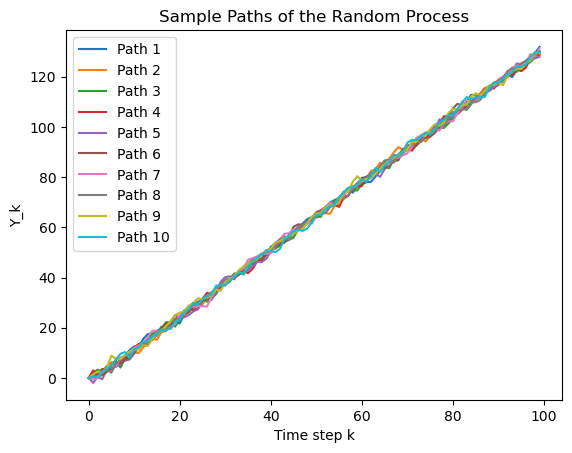

In [6]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.8
phi = 0.4
sigma_e = 1
n_samples = 100
n_paths = 10

np.random.seed(538)
for _ in range(n_paths):
    Y = np.zeros(n_samples)
    for k in range(1, n_samples):
        Y[k] = alpha * (k - 1) + phi * Y[k-1] + np.random.normal(0, sigma_e)
    plt.plot(Y, label=f'Path {_+1}')

plt.xlabel('Time step k')
plt.ylabel('Y_k')
plt.title('Sample Paths of the Random Process')
plt.legend()
plt.show()
